# Mathematics for Machine Learning

## Session 24: Vector calculus

### Gerhard Jäger


January 27, 2025

---
<br><br>

<small>Most material taken from Chapter 1 of Keisler, H. Jerome. *Elementary Calculus: An Infinitesimal Approach*. 2012 and Chapter 5 of Deisenroth, Faisal & Ong's (2024) Mathematics for Machine Learning,.</small><br>
<small>Applets programmed with the help of ChatGPT and Perplexity</small>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact
%matplotlib inline


# Multivariate functions

In machine learning we are often dealing with function having several inputs and several outputs. So in the general case, our functions have $\mathbb R^n$ (or a subset thereof) as input and $\mathbb R^m$ (or a subset thereof) as output:

$$
\mathbf u = f(\mathbf v)
$$

Dissolving the vectors into their components, this is

$$
\langle u_1,\ldots,u_n\rangle = \langle f_1(v_1, v_2, \ldots, v_m), \ldots, f_1(v_1, v_2, \ldots, v_m)\rangle
$$

Let us, for now, focus on the case $f:\mathbf R^m \mapsto \mathbf R$, i.e., several inputs and one output.

$$
y = f(x_1, \ldots, x_m)
$$

## Examples for functions with multiple input and single output in statistics and ML

- linear regression with multiple predictor variables
- logistic regression with multiple predictor variables
- perceptron

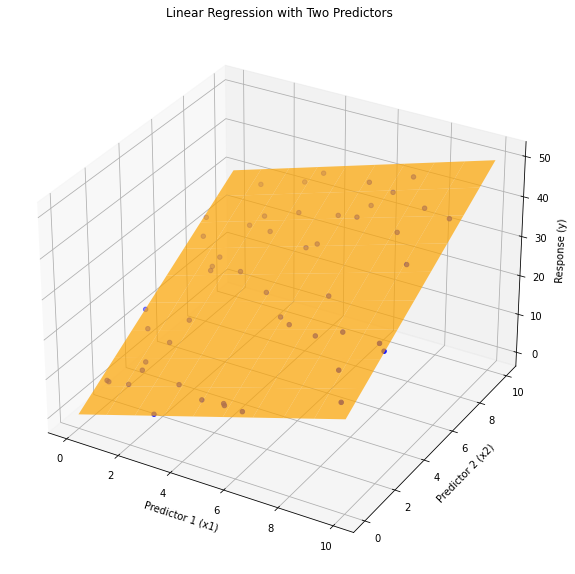

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 1. Linear Regression with Multiple Predictors
fig1 = plt.figure(figsize=(15, 10))
ax1 = fig1.add_subplot(111, projection='3d')

# Generate random data
np.random.seed(42)
x1 = np.random.uniform(0, 10, 50)
x2 = np.random.uniform(0, 10, 50)
y = 2*x1 + 3*x2 + np.random.normal(0, 2, 50)

# Plot data points
ax1.scatter(x1, x2, y, color='blue', label='Data points')

# Fit a plane
x1_grid, x2_grid = np.meshgrid(np.linspace(0, 10, 10), np.linspace(0, 10, 10))
y_grid = 2*x1_grid + 3*x2_grid  # True plane equation

# Plot the regression plane
ax1.plot_surface(x1_grid, x2_grid, y_grid, color='orange', alpha=0.7)
ax1.set_xlabel('Predictor 1 (x1)')
ax1.set_ylabel('Predictor 2 (x2)')
ax1.set_zlabel('Response (y)')
ax1.set_title('Linear Regression with Two Predictors')
plt.show()


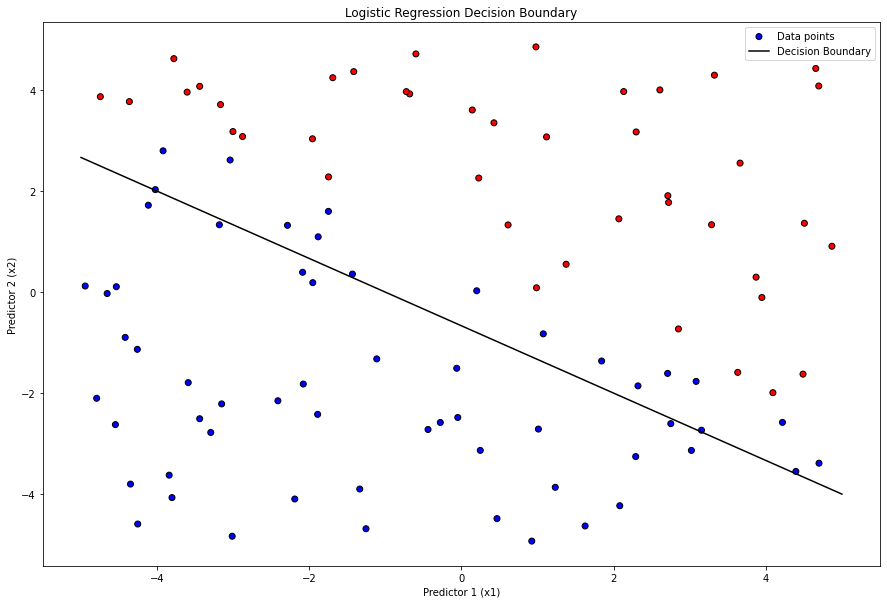

In [3]:
# 2. Logistic Regression Decision Boundary
fig2, ax2 = plt.subplots(figsize=(15, 10))

# Generate random data
np.random.seed(42)
n_points = 100
x1 = np.random.uniform(-5, 5, n_points)
x2 = np.random.uniform(-5, 5, n_points)
y = (2*x1 + 3*x2 > 2).astype(int)  # Simple linear decision boundary

# Plot data points
scatter = ax2.scatter(x1, x2, c=y, cmap='bwr', edgecolor='k', label='Data points')

# Plot decision boundary
x = np.linspace(-5, 5, 100)
boundary = -(2*x + 2)/3  # Decision boundary equation
ax2.plot(x, boundary, 'k-', label='Decision Boundary')

ax2.set_xlabel('Predictor 1 (x1)')
ax2.set_ylabel('Predictor 2 (x2)')
ax2.set_title('Logistic Regression Decision Boundary')
ax2.legend()
plt.show()

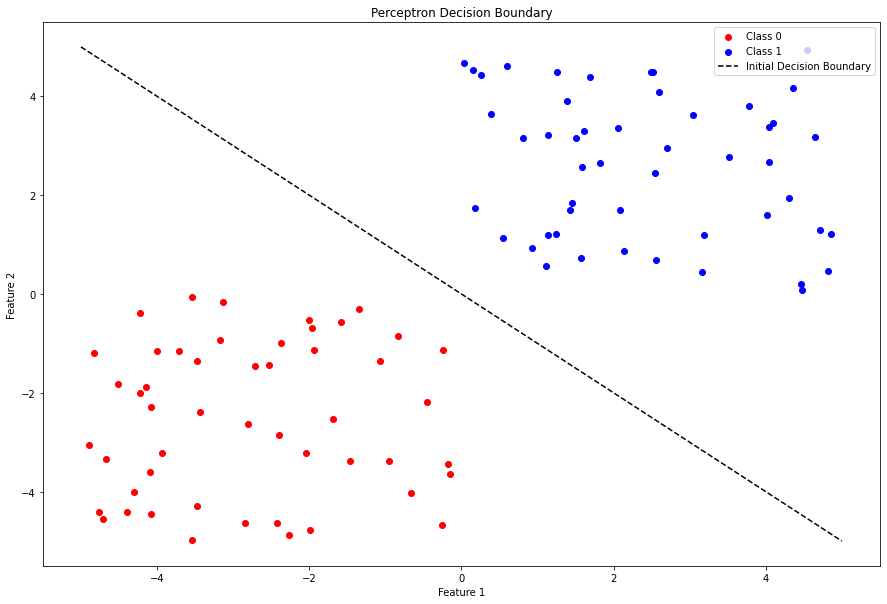

In [4]:
# 3. Perceptron Decision Boundary
fig3, ax3 = plt.subplots(figsize=(15, 10))

# Generate linearly separable data
np.random.seed(42)
x1_class1 = np.random.uniform(-5, 0, 50)
x2_class1 = np.random.uniform(-5, 0, 50)
x1_class2 = np.random.uniform(0, 5, 50)
x2_class2 = np.random.uniform(0, 5, 50)

# Combine data
x1_perceptron = np.concatenate([x1_class1, x1_class2])
x2_perceptron = np.concatenate([x2_class1, x2_class2])
y_perceptron = np.array([0]*50 + [1]*50)

# Plot data points
ax3.scatter(x1_class1, x2_class1, color='red', label='Class 0')
ax3.scatter(x1_class2, x2_class2, color='blue', label='Class 1')

# Plot initial decision boundary
x = np.linspace(-5, 5, 100)
decision_boundary = -x  # Example initial boundary (y = -x)
ax3.plot(x, decision_boundary, 'k--', label='Initial Decision Boundary')

ax3.set_xlabel('Feature 1')
ax3.set_ylabel('Feature 2')
ax3.set_title('Perceptron Decision Boundary')
ax3.legend()
plt.show()


For geometric intution, it makes sense to look at functions with two inputs and one output. They define a two-dimensional *surface* in threedimensional space.

In [5]:
# 4. Interactive 3D Surface Visualization and Isoclines
from ipywidgets import interact
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define a function with two inputs and one output
def surface_function(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

# Generate data points
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
x, y = np.meshgrid(x, y)
z = surface_function(x, y)

# Interactive 3D Plot
def interactive_plot(elevation, azimuth):
    fig = plt.figure(figsize=(15, 10))
    ax = fig.add_subplot(111, projection='3d')
    surface = ax.plot_surface(x, y, z, cmap='viridis', edgecolor='none', alpha=0.9)
    ax.view_init(elevation, azimuth)
    ax.set_title('Interactive 2D Function as 3D Surface', fontsize=16)
    ax.set_xlabel('Input 1 (x)', fontsize=12)
    ax.set_ylabel('Input 2 (y)', fontsize=12)
    ax.set_zlabel('Output (z)', fontsize=12)
    plt.colorbar(surface, shrink=0.5, aspect=10)
    plt.show()

interact(interactive_plot, elevation=(0, 90, 5), azimuth=(0, 360, 5))


interactive(children=(IntSlider(value=45, description='elevation', max=90, step=5), IntSlider(value=180, descr…

<function __main__.interactive_plot(elevation, azimuth)>

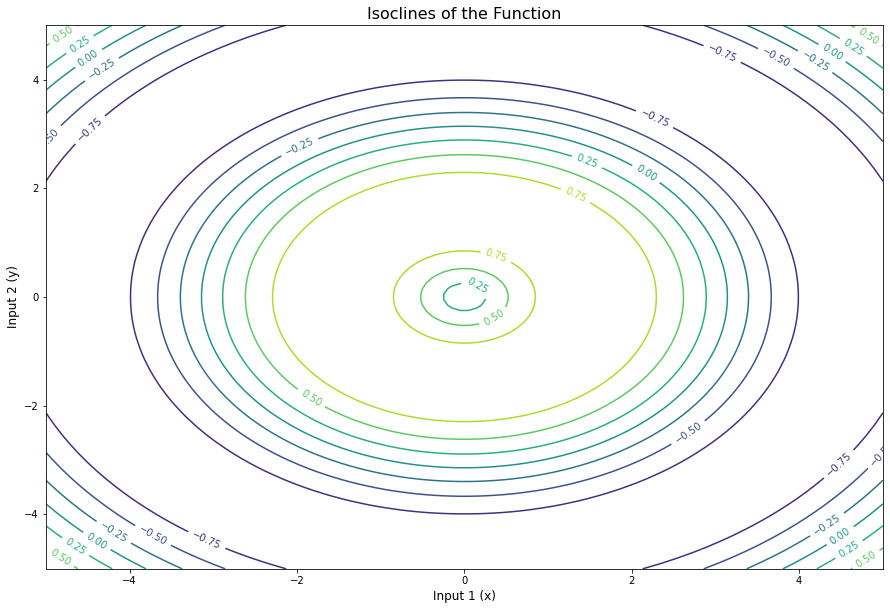

In [6]:

# Isoclines Plot
fig, ax = plt.subplots(figsize=(15, 10))
contour = ax.contour(x, y, z, cmap='viridis')
ax.clabel(contour, inline=True, fontsize=10)
ax.set_title('Isoclines of the Function', fontsize=16)
ax.set_xlabel('Input 1 (x)', fontsize=12)
ax.set_ylabel('Input 2 (y)', fontsize=12)
plt.show()


# Partial Derivatives

Partial derivatives are used to study the rates of change of functions of two or more variables. For a function $z = f(x, y)$, the rate of change depends on both the rate of change of $x$ and the rate of change of $y$.

Partial derivatives simplify this by isolating the change in one variable while keeping the other constant.

---

## Definition

Given a function $z = f(x, y)$, if we hold $y$ constant at $b$, we obtain a new function:

$$
g(x) = f(x, b)
$$

Geometrically, $z = g(x)$ represents the intersection of the surface $z = f(x, y)$ with the vertical plane $y = b$.

The **partial derivative** of $f(x, y)$ with respect to $x$ (while holding $y$ constant) is the slope of the curve $z = g(x)$. Similarly, there is a partial derivative with respect to $y$.

---

## Precise Definition

The partial derivatives of $f(x, y)$ at the point $(a, b)$ are defined as:

$$
f_x(a, b) = \operatorname{st} \frac{f(a + \Delta x, b) - f(a, b)}{\Delta x}
$$

$$
f_y(a, b) = \operatorname{st} \frac{f(a, b + \Delta y) - f(a, b)}{\Delta y}
$$


<img src="_img/partial_derivative.svg"  width="1000" style="display: block; margin-left: auto; margin-right: auto;">


# Notation for Partial Derivatives

Another convenient notation for partial derivatives uses the Cyrillic lower case $ \partial $, called a "round $ d $". If $ z = f(x, y) $, we use:

$$
\frac{\partial z}{\partial x}(x, y), \quad \frac{\partial z}{\partial x}, \quad \text{or} \quad \frac{\partial f}{\partial x} \quad \text{for} \quad f_x(x, y),
$$

$$
\frac{\partial z}{\partial y}(x, y), \quad \frac{\partial z}{\partial y}, \quad \text{or} \quad \frac{\partial f}{\partial y} \quad \text{for} \quad f_y(x, y).
$$

---

## Interpretation

Partial derivatives, like ordinary derivatives, may be represented as quotients of infinitesimals:

- In $ \frac{\partial z}{\partial x} $, $ \partial x $ means $ \Delta x $ and $ \partial z $ means $ f_x(x, y) \Delta x $.
- In $ \frac{\partial z}{\partial y} $, $ \partial y $ means $ \Delta y $ and $ \partial z $ means $ f_y(x, y) \Delta y $.

---

## Important Note

Notice that $ \partial z $ has a different meaning in $ \frac{\partial z}{\partial x} $ than it has in $ \frac{\partial z}{\partial y} $. For this reason, we avoid using the symbol $ \partial z $ alone.

Partial derivatives are easily computed using the ordinary rules of differentiation, with all but one variable treated as a constant.


## Total differential and tangent plain

**DEFINITION**

A function $f(\mathbf v)$  is said to be *continuous* at $\mathbf v_0$ if for all vector $\mathbf u \approx \mathbf v_0$, $f(\mathbf u) \approx f(\mathbf v_0)$.

---



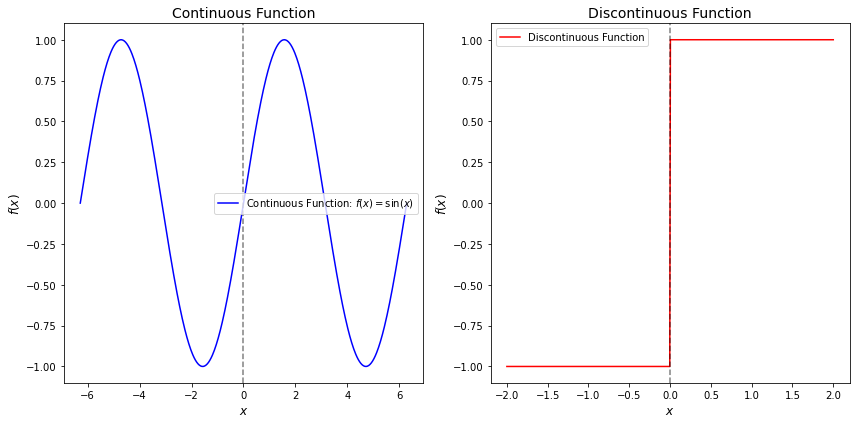

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Define a continuous function
def continuous_function(x):
    return np.sin(x)

# Define a discontinuous function
def discontinuous_function(x):
    return np.where(x < 0, -1, 1)

# Generate x values
x_cont = np.linspace(-2 * np.pi, 2 * np.pi, 500)
x_disc = np.linspace(-2, 2, 500)

# Plot
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Continuous function
axes[0].plot(x_cont, continuous_function(x_cont), color="blue", label="Continuous Function: $f(x) = \sin(x)$")
axes[0].set_title("Continuous Function", fontsize=14)
axes[0].set_xlabel("$x$", fontsize=12)
axes[0].set_ylabel("$f(x)$", fontsize=12)
axes[0].axvline(0, color="black", linestyle="--", alpha=0.5)
axes[0].legend(fontsize=10)

# Discontinuous function
axes[1].plot(x_disc, discontinuous_function(x_disc), color="red", label="Discontinuous Function")
axes[1].set_title("Discontinuous Function", fontsize=14)
axes[1].set_xlabel("$x$", fontsize=12)
axes[1].set_ylabel("$f(x)$", fontsize=12)
axes[1].axvline(0, color="black", linestyle="--", alpha=0.5)
axes[1].legend(fontsize=10)

plt.tight_layout()
plt.show()


## Definition

A function $f(x, y)$ is said to be **smooth** at $(a, b)$ if both of its partial derivatives exist and are continuous at $(a, b)$.


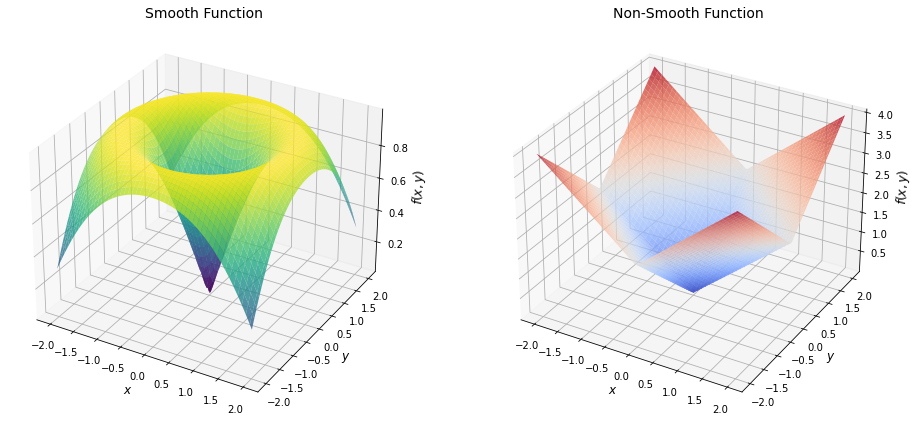

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Define a smooth function
def smooth_function(x, y):
    return np.sin(np.sqrt(x**2 + y**2))

# Define a non-smooth function
def nonsmooth_function(x, y):
    return np.abs(x) + np.abs(y)

# Create a grid
x = np.linspace(-2, 2, 100)
y = np.linspace(-2, 2, 100)
X, Y = np.meshgrid(x, y)

# Compute the function values
Z_smooth = smooth_function(X, Y)
Z_nonsmooth = nonsmooth_function(X, Y)

# Plot the functions
fig, axes = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={"projection": "3d"})

# Smooth function
axes[0].plot_surface(X, Y, Z_smooth, cmap="viridis", edgecolor="none", alpha=0.8)
axes[0].set_title("Smooth Function", fontsize=14)
axes[0].set_xlabel("$x$", fontsize=12)
axes[0].set_ylabel("$y$", fontsize=12)
axes[0].set_zlabel("$f(x, y)$", fontsize=12)

# Non-smooth function
axes[1].plot_surface(X, Y, Z_nonsmooth, cmap="coolwarm", edgecolor="none", alpha=0.8)
axes[1].set_title("Non-Smooth Function", fontsize=14)
axes[1].set_xlabel("$x$", fontsize=12)
axes[1].set_ylabel("$y$", fontsize=12)
axes[1].set_zlabel("$f(x, y)$", fontsize=12)

plt.tight_layout()
plt.show()


A function with a discontinuous partial derivative:

### Function Definition

The function $f(x, y)$ is defined as:

$$
f(x, y) =
\begin{cases}
\frac{xy}{x^2 + y^2}, & \text{if } (x, y) \neq (0, 0), \\\\
0, & \text{if } (x, y) = (0, 0).
\end{cases}
$$

The partial derivative of \(f(x, y)\) with respect to \(x\) is:

$$
\frac{\partial f}{\partial x} =
\begin{cases}
\frac{y(y^2 - x^2)}{(x^2 + y^2)^2}, & \text{if } (x, y) \neq (0, 0), \\\\
0, & \text{if } (x, y) = (0, 0).
\end{cases}
$$

This partial derivative exists at every point, including $(0, 0)$, but its behavior near $(0, 0)$ is problematic.


The partial derivative $ \frac{\partial f}{\partial x} $ is **not continuous** at $(0, 0)$ because its value depends on the direction of approach as $(x, y) \to (0, 0)$.

- For example:
  - Along the line $ y = mx $, the value of $ \frac{\partial f}{\partial x} $ changes with the slope \(m\).

Thus, the partial derivative exists everywhere but is not continuous at $(0, 0)$.


In [9]:
import numpy as np
import plotly.graph_objects as go

# Define the function f(x, y)
def f(x, y):
    return np.where((x == 0) & (y == 0), 0, (x * y) / (x**2 + y**2))

# Define the partial derivative with respect to x
def partial_f_x(x, y):
    return np.where((x == 0) & (y == 0), 0, y * (y**2 - x**2) / (x**2 + y**2)**2)

# Create a grid for visualization
x = np.linspace(-1, 1, 100)
y = np.linspace(-1, 1, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)
Z_partial_x = partial_f_x(X, Y)

# Create the first plot for f(x, y)
fig = go.Figure()

fig.add_trace(
    go.Surface(
        z=Z,
        x=X,
        y=Y,
        colorscale="Viridis",
        showscale=True,
        name="f(x, y)",
    )
)
fig.update_layout(
    title="Function f(x, y)",
    scene=dict(
        xaxis_title="x",
        yaxis_title="y",
        zaxis_title="f(x, y)",
    ),
)

# Create the second plot for the partial derivative
fig2 = go.Figure()

fig2.add_trace(
    go.Surface(
        z=Z_partial_x,
        x=X,
        y=Y,
        colorscale="RdBu",
        showscale=True,
        name="∂f/∂x",
    )
)
fig2.update_layout(
    title="Partial Derivative ∂f/∂x",
    scene=dict(
        xaxis_title="x",
        yaxis_title="y",
        zaxis_title="∂f/∂x",
    ),
)

# Show the interactive plots
fig.show()
fig2.show()


## Increment Theorem for Two Variables

Suppose $z = f(x, y)$ is smooth at $(a, b)$. Let $\Delta x$ and $\Delta y$ be infinitesimal. Then:

$$
f(x+\Delta x, y+\Delta y) - f(x,y) = \frac{\partial f(x,y)}{\partial x}\Delta x + \frac{\partial f(x,y)}{\partial y}\Delta y + \epsilon_1 \Delta x + \epsilon_2 \Delta y
$$

for some infinitesimals $\epsilon_1$ and $\epsilon_2$ which depend on $\Delta x$ and $\Delta y$.

---

The theorem generalizes to $n$ variables.


**PROOF**

The Increment Theorem for a single variables almost gives us the desired result, but not quite:

$$
\begin{align}
f(x+\Delta x, y+\Delta y)  &= f(x,y+\Delta y) + \frac{\partial f(x, y+\Delta y)}{\partial x}\Delta x + \varepsilon_1 \Delta x\\
&= f(x,y) + \frac{\partial f(x, y+\Delta y)}{\partial x}\Delta x + \frac{\partial f(x,y)}{\partial y}\Delta y + \varepsilon_1 \Delta x + \varepsilon_2\Delta y
\end{align}
$$

Since $f$ is smooth, the partial derivative $\frac{\partial f(x,y)}{\partial x}$ is continuous. Therefore, for some infinitesimal $\delta$:

$$
\frac{\partial f(x,y+\Delta y)}{\partial x} - \frac{\partial f(x,y)}{\partial x} = \delta
$$

Inserting this into the previous equation, we get

$$
\begin{align}
f(x+\Delta x, y+\Delta y)  &= f(x,y) + (\frac{\partial f(x, y)}{\partial x}+\delta)\Delta x + \frac{\partial f(x,y)}{\partial y}\Delta y + \varepsilon_1 \Delta x + \varepsilon_2\Delta y\\
&= f(x,y) + \frac{\partial f(x, y)}{\partial x}\Delta x+\delta\Delta x + \frac{\partial f(x,y)}{\partial y}\Delta y 
+ \varepsilon_1 \Delta x + \varepsilon_2\Delta y\\
&= f(x,y) + \frac{\partial f(x, y)}{\partial x}\Delta x + \frac{\partial f(x,y)}{\partial y}\Delta y + (\varepsilon_1+\delta) \Delta x + \varepsilon_2\Delta y\\
\end{align}
$$

<img src="_img/increment_2d.svg"  width="1000" style="display: block; margin-left: auto; margin-right: auto;">


## The tangent (hyper-)plane

It is a consequence of the *Increment Theorem for Two Variables* that the increment $\Delta z$ of $z = f(a,b)$ can be approximated by a linear surface within an infinitesimal environment of $(a,b)$. This linear surface is called the **tangent plane** of $f$ at $(a,b)$. (In higher dimensions, it is a hyperplane.)

**DEFINITION**

The **tangent plane** of a smooth function $z = f(x,y)$ at $(a,b)$ is the plane with the equation

$$
z = f(a,b)+\frac{\left.\partial z\right|_{x=a, y=b}}{\partial x}(x-a) + \frac{\left.\partial z\right|_{x=a, y=b}}{\partial y}(y-b)
$$

---
The tangent plane touches the surface defined by the function $f$ at $(a,b)$.

<img src="_img/tangent_plane.svg"  width="1000" style="display: block; margin-left: auto; margin-right: auto;">


# The Gradient

The **gradient** of a scalar function $f(x, y)$ is the vector of its partial derivatives:

$$
\nabla f(x, y) = \left\langle \frac{\partial f}{\partial x}, \frac{\partial f}{\partial y} \right\rangle.
$$

In higher dimensions, for $f(x_1, x_2, \ldots, x_n)$:

$$
\nabla f = \left\langle \frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2}, \ldots, \frac{\partial f}{\partial x_n} \right\rangle.
$$

---

**Remarks on notation**

Sometimes you als read 
$$
\nabla_{\mathbf x}z
$$

or 
$$
\frac{d z}{d\mathbf x}
$$

instead of $\nabla z$, where $\mathbf x$ is a sequence of variables. This is useful if $z$ depends on more variables then just those in $\mathbf x$.

### Geometric Interpretation of the Gradient

Suppose we have a smooth scalar function $f(\mathbf x)$ with the gradient $\nabla f$.

Let $\mathbf v$ be a vector. Then $\left.\nabla f(\mathbf x)\right|_{\mathbf x=\mathbf v}$ is the gradient of $f$ at $\mathbf v$. The tangent hyperplane is the linear function $z = g(\mathbf y)$ with the equation

$$
z = f(\mathbf v) + \langle\left.\nabla f(\mathbf x)\right|_{\mathbf x=\mathbf v}, (\mathbf y-\mathbf v)\rangle
$$

We want to know in which direction the ascent of $f$ is steepest. Thanks to the Increment Theorem, this is also the direction where the ascent of the tangent plane is steepest.

This direction is not affected when we shift the center of the coordinate system to $f(\mathbf v)$. In the new coordinate system, the equation of the tangent plane is

$$
\begin{align}
z &= \langle\left.\nabla f(\mathbf x)\right|_{\mathbf x=\mathbf v}, \mathbf y\rangle\\
&=\|\left.\nabla f(\mathbf x)\right|_{\mathbf x=\mathbf v}\|\,\|\mathbf y\|\, \cos \theta
\end{align}
$$
$\theta$ is the angle between the gradient and $\mathbf y$

We are looking for the unit vector $\mathbf y^*$ that maximizes $z$. The cosine function reaches is maximum at $\theta = 0$, so $\mathbf y^*$ must be parallel to $\mathbf v$.

In [10]:
import numpy as np
import plotly.graph_objects as go

# Define the scalar function f(x, y) = x^2 + y^2 (a paraboloid)
def f(x, y):
    return x**2 + y**2

# Gradient of f: ∇f = [∂f/∂x, ∂f/∂y]
def gradient_f(x, y):
    return 2*x, 2*y

# Define a point of interest (v_x, v_y)
v_x, v_y = 1, 1  # Point where gradient is evaluated
v_z = f(v_x, v_y)

# Create a grid for the tangent plane visualization
x = np.linspace(-2, 2, 30)
y = np.linspace(-2, 2, 30)
X, Y = np.meshgrid(x, y)

# Tangent plane at (v_x, v_y)
grad_x, grad_y = gradient_f(v_x, v_y)
Z_tangent = v_z + grad_x * (X - v_x) + grad_y * (Y - v_y)

# Original surface
Z_surface = f(X, Y)

# Scale the gradient vector for better visualization
scale_factor = 1.5
grad_x_scaled, grad_y_scaled = grad_x * scale_factor, grad_y * scale_factor

# Create the plotly figure
fig = go.Figure()

# Add the surface (original function)
fig.add_trace(go.Surface(z=Z_surface, x=X, y=Y, colorscale='Viridis', opacity=0.7, name="Surface"))

# Add the tangent plane
fig.add_trace(go.Surface(z=Z_tangent, x=X, y=Y, colorscale='Oranges', opacity=0.7, name="Tangent Plane"))

# Add the point of tangency
fig.add_trace(go.Scatter3d(
    x=[v_x],
    y=[v_y],
    z=[v_z],
    mode='markers',
    marker=dict(size=8, color='red'),
    name="Point of Tangency"
))

# Add the gradient vector as an arrow
fig.add_trace(go.Cone(
    x=[v_x], y=[v_y], z=[v_z],
    u=[grad_x_scaled], v=[grad_y_scaled], w=[0],
    sizemode="absolute",
    sizeref=0.6,
    anchor="tail",
    colorscale="Blues",
    name="Gradient Vector"
))

# Update layout for better visuals
fig.update_layout(
    title="Tangent Plane and Gradient Visualization",
    scene=dict(
        xaxis_title="X-axis",
        yaxis_title="Y-axis",
        zaxis_title="Z-axis",
        aspectratio=dict(x=1, y=1, z=0.7),
    ),
    margin=dict(l=0, r=0, t=50, b=0)
)

# Show the interactive plot
fig.show()



### Geometric Interpretation of the Gradient

The gradient vector $\nabla f(x, y)$:

- Points in the direction of **steepest ascent** of the function $f(x, y)$.
- Is **perpendicular** to the level curves of $f(x, y)$.



### Visual Intuition

- Level curves are curves along which $f(x, y)$ is constant.
- The gradient $\nabla f(x, y)$ is perpendicular to these curves.


In [13]:
import numpy as np
import plotly.graph_objects as go
from ipywidgets import interactive

# Define the scalar function f(x, y) = x * sin(y) + y * cos(x)
def f(x, y):
    return x * np.sin(y) + y * np.cos(x)

# Corrected gradient of f: ∇f = [∂f/∂x, ∂f/∂y]
def gradient_f(x, y):
    df_dx = np.sin(y) - y * np.sin(x)  # ∂f/∂x
    df_dy = x * np.cos(y) + np.cos(x)  # ∂f/∂y
    return df_dx, df_dy

# Define a grid for the level curves
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)  # Compute function values

# Function to update the plot based on slider inputs
def update_plot(v_x, v_y):
    grad_x, grad_y = gradient_f(v_x, v_y)

    # Create the figure
    fig = go.Figure()

    # Add the level curves
    fig.add_trace(go.Contour(
        z=Z,
        x=x,
        y=y,
        colorscale="Cividis",
        contours=dict(showlabels=True),
        line_width=2,
        name="Level Curves"
    ))

    # Add the gradient vector as a line
    fig.add_trace(go.Scatter(
        x=[v_x, v_x + grad_x],
        y=[v_y, v_y + grad_y],
        mode='lines',
        line=dict(color='red', width=4),
        name="Gradient Vector"
    ))

    # Add a larger arrowhead for the gradient vector
    fig.add_annotation(
        x=v_x + grad_x,
        y=v_y + grad_y,
        ax=v_x,
        ay=v_y,
        xref="x",
        yref="y",
        axref="x",
        ayref="y",
        showarrow=True,
        arrowhead=3,
        arrowsize=2.5,  # Larger arrowhead
        arrowcolor="red",
        name="Gradient Arrow"
    )

    # Update layout
    fig.update_layout(
        title="Gradient and Level Curves (f(x, y) = x * sin(y) + y * cos(x))",
        xaxis_title="X-axis",
        yaxis_title="Y-axis",
        width=800,
        height=800,
        dragmode="pan",
        showlegend=True
    )

    fig.show()

# Create interactive sliders for x and y
interactive_plot = interactive(update_plot, v_x=(-3.0, 3.0, 0.1), v_y=(-3.0, 3.0, 0.1))
interactive_plot


interactive(children=(FloatSlider(value=0.0, description='v_x', max=3.0, min=-3.0), FloatSlider(value=0.0, des…

# Example: Gradient of a Function

Let $f(x, y) = x^2 + y^2$. Compute $\nabla f(x, y)$:

$$
\frac{\partial f}{\partial x} = 2x, \quad \frac{\partial f}{\partial y} = 2y.
$$

Thus, the gradient is:

$$
\nabla f(x, y) = \langle 2x, 2y \rangle.
$$
--

### Observations

- At $(1, 1)$, $\nabla f(1, 1) = \langle 2, 2 \rangle$.
- The gradient points radially outward, perpendicular to level curves of $f(x, y) = x^2 + y^2$.
---

## Rules for computing the gradient

$$
\begin{align}
\nabla_{\mathbf x} A\mathbf x &= A \\
\nabla_{\mathbf x} (\mathbf a^T \mathbf x) &= \mathbf a, \quad \text{where } \mathbf a \text{ is a constant vector.} \\
\nabla_{\mathbf x} \|\mathbf x\|^2 &= 2\mathbf x, \quad \text{where } \|\mathbf x\|^2 = \mathbf x^T \mathbf x. \\
\nabla_{\mathbf x} \|\mathbf x\| &= \frac{\mathbf x}{\|\mathbf x\|}, \quad \text{for } \|\mathbf x\| \neq 0. \\
\nabla_{\mathbf x} (c) &= \mathbf 0, \quad \text{where } c \text{ is a constant scalar.} \\
\nabla_{\mathbf x} (\mathbf x^T A \mathbf x) &= (A + A^T)\mathbf x, \quad \text{where } A \text{ is a constant matrix.} \\
\nabla_{\mathbf x} (f(g(\mathbf x))) &= (\nabla_{\mathbf y} f(g(\mathbf x))) (\nabla_{\mathbf x} g(\mathbf x))^T, \quad \text{(Chain Rule).}
\end{align}
$$

### Notes:
- These rules are fundamental for linear algebra, optimization, and machine learning.
- The **chain rule** is particularly important when dealing with compositions of functions.
